In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# S_data

## Data Description

In [2]:
S = pd.read_csv('S_data.csv')

In [3]:
S.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Palau,Office Supplies,Online,H,3/6/2016,517073523,3/26/2016,2401,651.21,524.96,1563555.21,1260428.96,303126.25
1,Europe,Poland,Beverages,Online,L,4/18/2010,380507028,5/26/2010,9340,47.45,31.79,443183.00,296918.60,146264.40
2,North America,Canada,Cereal,Online,M,1/8/2015,504055583,1/31/2015,103,205.70,117.11,21187.10,12062.33,9124.77
3,Europe,Belarus,Snacks,Online,C,1/19/2014,954955518,2/27/2014,1414,152.58,97.44,215748.12,137780.16,77967.96
4,Middle East and North Africa,Oman,Cereal,Offline,H,4/26/2019,970755660,6/2/2019,7027,205.70,117.11,1445453.90,822931.97,622521.93
5,Sub-Saharan Africa,Burkina Faso,Office Supplies,Online,C,3/3/2012,309317338,4/5/2012,2729,651.21,524.96,1777152.09,1432615.84,344536.25
6,Europe,Montenegro,Personal Care,Online,H,11/24/2012,598814380,12/25/2012,1337,81.73,56.67,109273.01,75767.79,33505.22
7,Middle East and North Africa,Azerbaijan,Cosmetics,Offline,M,3/18/2011,387733113,5/5/2011,7699,437.20,263.33,3366002.80,2027377.67,1338625.13
8,Sub-Saharan Africa,South Sudan,Clothes,Offline,C,5/10/2014,994872367,6/17/2014,3696,109.28,35.84,403898.88,132464.64,271434.24
9,North America,Greenland,Personal Care,Online,C,5/25/2020,659343469,6/14/2020,3239,81.73,56.67,264723.47,183554.13,81169.34


In [4]:
S.shape

(5000000, 14)

In [5]:
S.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   Item Type       object 
 3   Sales Channel   object 
 4   Order Priority  object 
 5   Order Date      object 
 6   Order ID        int64  
 7   Ship Date       object 
 8   Units Sold      int64  
 9   Unit Price      float64
 10  Unit Cost       float64
 11  Total Revenue   float64
 12  Total Cost      float64
 13  Total Profit    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 534.1+ MB


In [28]:
S.isnull().sum()

Region             0
Country            0
Item Type          0
Sales Channel      0
Order Priority     0
Order Date         0
Order ID           0
Ship Date          0
Units Sold         0
Unit Price         0
Unit Cost          0
Total Revenue      0
Total Cost         0
Total Profit       0
Profit_per_unit    0
Profit Margin      0
dtype: int64

## Data Preprocessing

In [10]:
# object -> Datetime
from datetime import datetime
S['Order Date'] = pd.to_datetime(S['Order Date'])
S['Ship Date'] = pd.to_datetime(S['Ship Date'])

In [18]:
# Calculate 'Profit per unit'
S['Profit_per_unit'] = S['Unit Price'] - S['Unit Cost']

In [19]:
# Calculate 'profit margin'
S['Profit Margin'] = (S['Total Profit'] / S['Total Revenue']) * 100

In [20]:
S.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit_per_unit,Profit Margin
0,Australia and Oceania,Palau,Office Supplies,Online,H,2016-03-06,517073523,2016-03-26,2401,651.21,524.96,1563555.21,1260428.96,303126.25,126.25,19.386987
1,Europe,Poland,Beverages,Online,L,2010-04-18,380507028,2010-05-26,9340,47.45,31.79,443183.00,296918.60,146264.40,15.66,33.003161
2,North America,Canada,Cereal,Online,M,2015-01-08,504055583,2015-01-31,103,205.70,117.11,21187.10,12062.33,9124.77,88.59,43.067574
3,Europe,Belarus,Snacks,Online,C,2014-01-19,954955518,2014-02-27,1414,152.58,97.44,215748.12,137780.16,77967.96,55.14,36.138419
4,Middle East and North Africa,Oman,Cereal,Offline,H,2019-04-26,970755660,2019-06-02,7027,205.70,117.11,1445453.90,822931.97,622521.93,88.59,43.067574


## Univariate Analysis #1

In [21]:
# Just use United States data
USA_data = S[S['Country'] == 'United States of America']

# Calculate average profit margin by item type
avg_margin_by_item = USA_data.groupby('Item Type')['Profit Margin'].mean()
avg_margin_by_item

Item Type
Baby Food          37.550924
Beverages          33.003161
Cereal             43.067574
Clothes            67.203514
Cosmetics          39.768984
Fruits             25.830654
Household          24.799856
Meat               13.558036
Office Supplies    19.386987
Personal Care      30.661936
Snacks             36.138419
Vegetables         40.977541
Name: Profit Margin, dtype: float64

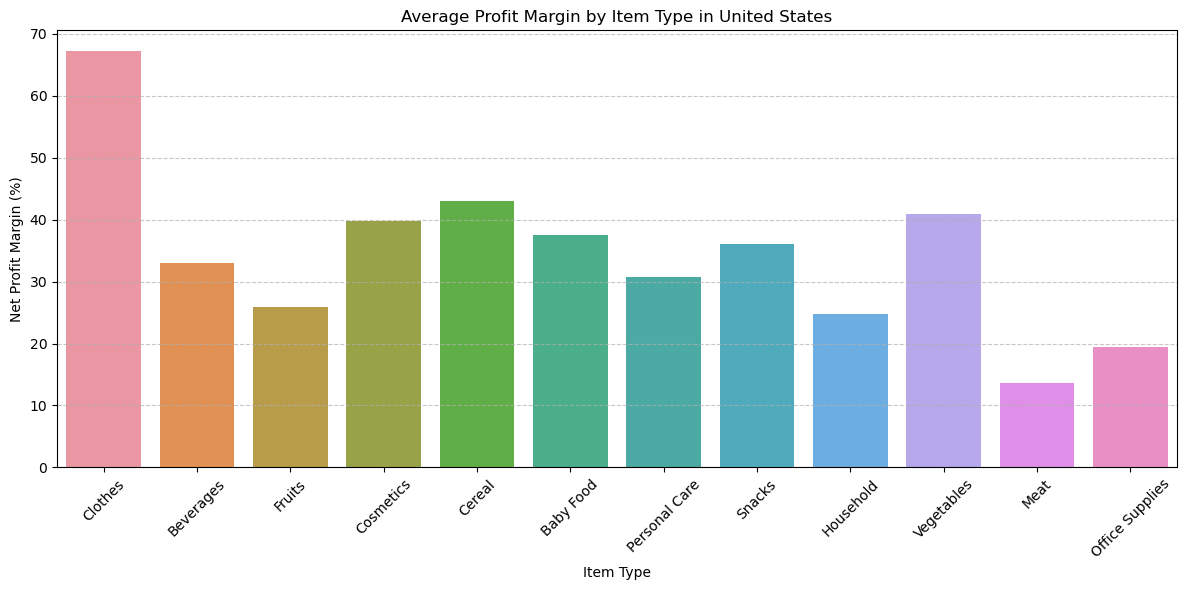

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=USA_data, x='Item Type', y='Profit Margin')
plt.title('Average Profit Margin by Item Type in United States')
plt.xlabel('Item Type')
plt.ylabel('Net Profit Margin (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [24]:
# Calculate average profit per unit by item type
profit_per_unit_by_item = USA_data.groupby('Item Type')['Profit_per_unit'].mean()
profit_per_unit_by_item

Item Type
Baby Food           95.86
Beverages           15.66
Cereal              88.59
Clothes             73.44
Cosmetics          173.87
Fruits               2.41
Household          165.73
Meat                57.20
Office Supplies    126.25
Personal Care       25.06
Snacks              55.14
Vegetables          63.13
Name: Profit_per_unit, dtype: float64

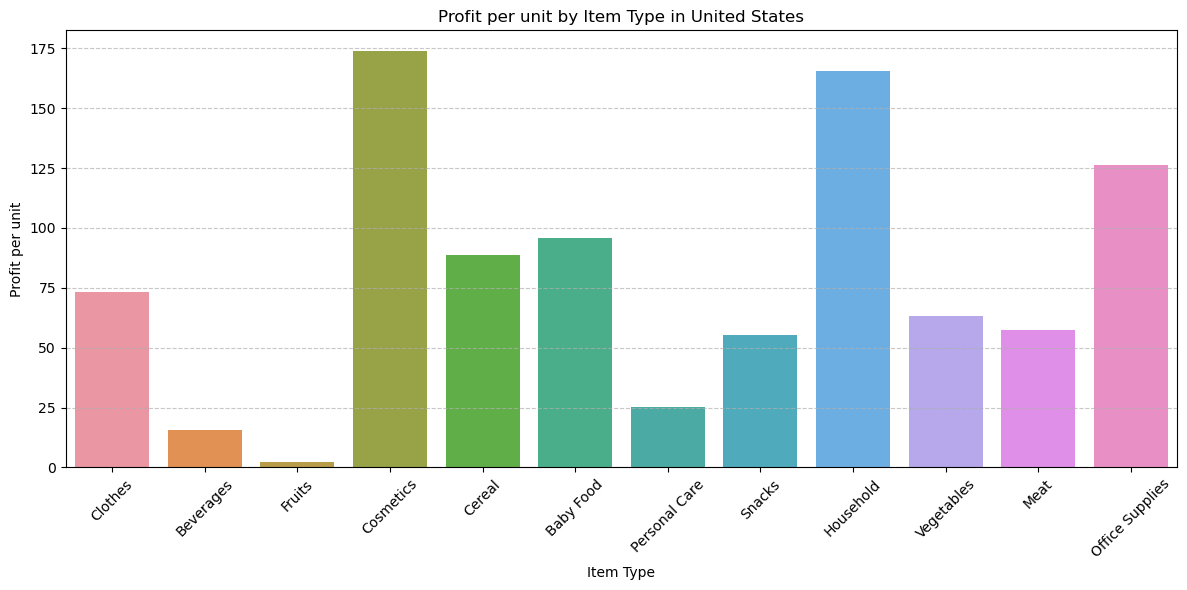

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(data=USA_data, x='Item Type', y='Profit_per_unit')
plt.title('Profit per unit by Item Type in United States')
plt.xlabel('Item Type')
plt.ylabel('Profit per unit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Univariate Analysis #2

In [31]:
# From now on, I will use `clothes` data in United states
USA_data_clothes = USA_data[USA_data['Item Type']=='Clothes']

In [32]:
USA_data_clothes.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit_per_unit,Profit Margin
96,North America,United States of America,Clothes,Offline,M,2018-05-21,170386207,2018-07-03,9920,109.28,35.84,1084057.60,355532.80,728524.80,73.44,67.203514
359,North America,United States of America,Clothes,Online,M,2016-07-24,259563863,2016-08-08,9570,109.28,35.84,1045809.60,342988.80,702820.80,73.44,67.203514
1134,North America,United States of America,Clothes,Offline,M,2013-12-15,785516726,2014-01-08,710,109.28,35.84,77588.80,25446.40,52142.40,73.44,67.203514
2311,North America,United States of America,Clothes,Online,L,2010-09-14,177784383,2010-10-23,9204,109.28,35.84,1005813.12,329871.36,675941.76,73.44,67.203514
2647,North America,United States of America,Clothes,Offline,H,2010-10-26,662205922,2010-11-17,303,109.28,35.84,33111.84,10859.52,22252.32,73.44,67.203514


In [33]:
USA_data_clothes.groupby('Order Priority').describe()

Order Date                                                      \
                    count                           mean                  min   
Order Priority                                                                  
C                     571  2015-05-03 10:32:59.684763648  2010-01-06 00:00:00   
H                     559  2015-06-16 15:40:15.026833408  2010-01-08 00:00:00   
L                     542  2015-05-28 10:11:04.206642176  2010-01-04 00:00:00   
M                     567  2015-03-10 19:07:56.190476288  2010-01-01 00:00:00   

                                                                               \
                                25%                  50%                  75%   
Order Priority                                                                  
C               2012-10-14 00:00:00  2015-05-29 00:00:00  2017-12-13 00:00:00   
H               2012-10-12 00:00:00  2015-08-13 00:00:00  2018-03-25 00:00:00   
L               2012-09-28 00:00:00  2015-06-28 00:00:00  2018-03-02 00:00:00   
M               2012-08-29 00:00:00  2015-02-15 00:00:00  2017-09-21 12:00:00   

                                         Order ID                             \
                                max  std    count          mean          min   
Order Priority                                                                 
C               2020-08-29 00:00:00  NaN    571.0  5.520777e+08  109632241.0   
H               2020-08-31 00:00:00  NaN    559.0  5.565090e+08  103403079.0   
L               2020-09-05 00:00:00  NaN    542.0  5.395019e+08  101148307.0   
M               2020-09-02 00:00:00  NaN    567.0  5.517296e+08  100119626.0   

                                                                    \
                        25%          50%          75%          max   
Order Priority                                                       
C               335488187.5  543207252.0  775489770.5  983208835.0   
H               324362384.5  568799388.0  772206317.5  998062264.0   
L               314722526.0  546490705.0  752617394.5  974724900.0   
M               325518310.0  531637275.0  780175912.0  999090945.0   

                             Ship Date                                 \
                         std     count                           mean   
Order Priority                                                          
C               2.579073e+08       571  2015-05-27 01:15:39.404553472   
H               2.629019e+08       559  2015-07-10 12:06:26.404293376   
L               2.590309e+08       542  2015-06-20 22:29:40.073800704   
M               2.605289e+08       567  2015-04-03 17:00:57.142857216   

                                                                               \
                                min                  25%                  50%   
Order Priority                                                                  
C               2010-01-18 00:00:00  2012-11-06 00:00:00  2015-06-03 00:00:00   
H               2010-01-21 00:00:00  2012-10-30 00:00:00  2015-09-24 00:00:00   
L               2010-01-16 00:00:00  2012-10-31 00:00:00  2015-07-30 12:00:00   
M               2010-01-12 00:00:00  2012-09-05 00:00:00  2015-03-16 00:00:00   

                                                              Units Sold  \
                                75%                  max  std      count   
Order Priority                                                             
C               2017-12-29 00:00:00  2020-10-04 00:00:00  NaN      571.0   
H               2018-04-16 12:00:00  2020-10-07 00:00:00  NaN      559.0   
L               2018-03-07 00:00:00  2020-10-13 00:00:00  NaN      542.0   
M               2017-10-14 00:00:00  2020-10-10 00:00:00  NaN      567.0   

                                                                   \
                       mean   min     25%     50%     75%     max   
Order Priority                                                      
C      

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


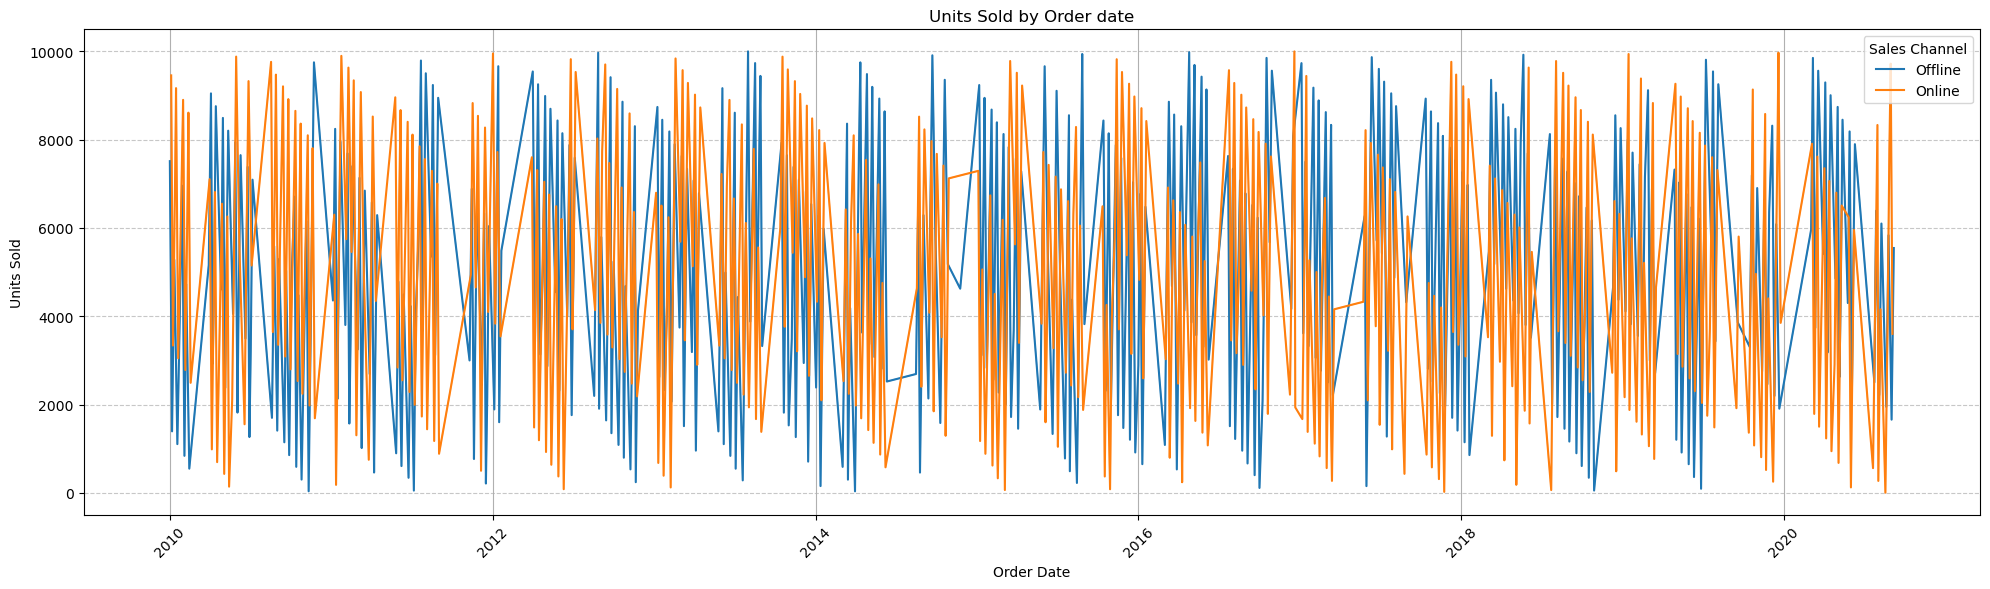

In [34]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=USA_data_clothes, x='Order Date', y='Units Sold', hue = 'Sales Channel')
plt.grid(True)

plt.title('Units Sold by Order date')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Multivariate Analysis - Correlation

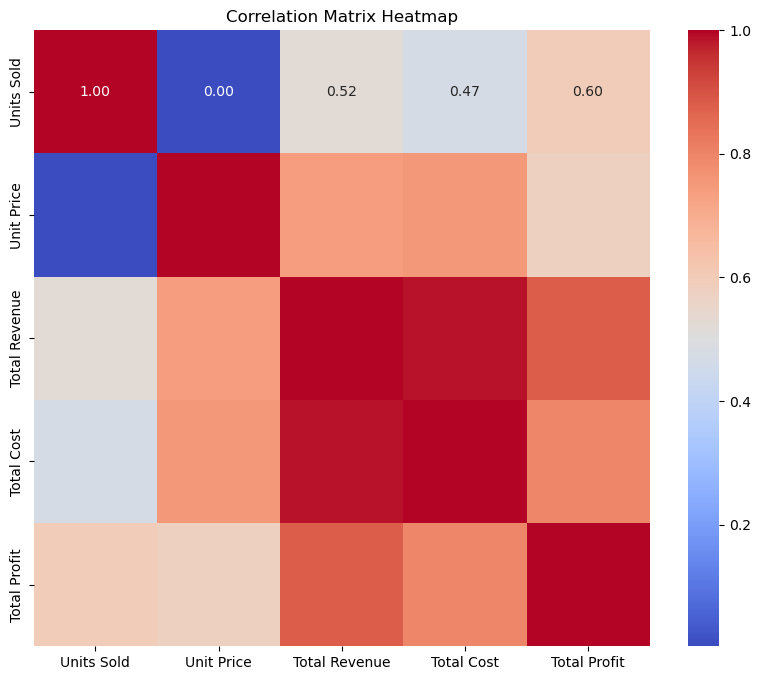

In [40]:
USA_data_corr = USA_data[['Units Sold','Unit Price','Total Revenue','Total Cost','Total Profit']]
correlation_matrix = USA_data_corr.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Add title and show plot
plt.title('Correlation Matrix Heatmap')
plt.show()

In [42]:
USA_data.groupby('Item Type').nunique()

,Region,Country,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit_per_unit,Profit Margin
Item Type,,,,,,,,,,,,,,,
Baby Food,1,1,2,4,945,945,794,945,1,1,945,945,945,1,4
Beverages,1,1,2,4,946,946,807,946,1,1,946,946,946,1,2
Cereal,1,1,2,4,945,945,812,945,1,1,945,945,945,1,3
Clothes,1,1,2,4,945,945,831,945,1,1,945,945,945,1,3
Cosmetics,1,1,2,4,944,944,808,944,1,1,944,944,944,1,2
Fruits,1,1,2,4,944,944,801,944,1,1,944,944,944,1,3
Household,1,1,2,4,944,944,826,944,1,1,944,944,944,1,3
Meat,1,1,2,4,945,945,825,945,1,1,945,945,945,1,3
Office Supplies,1,1,2,4,944,944,808,944,1,1,944,944,944,1,3


## Multivariate Analysis - ANOVA

In [47]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols 

# Replace column name to 'TotalProfit' and 'OrderPriority'
USA_data_clothes.rename(columns={'Total Profit': 'TotalProfit', 'Order Priority': 'OrderPriority'}, inplace=True)

# Perform ANOVA analysis
formula = 'TotalProfit ~ C(OrderPriority)'
model = ols(formula, data=USA_data_clothes).fit()
aov_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA table
print(aov_table)

                        sum_sq      df         F    PR(>F)
C(OrderPriority)  7.473710e+11     3.0  5.602042  0.000797
Residual          9.939079e+13  2235.0       NaN       NaN


/var/folders/cy/mcxz65_n14z24t919qlxn1rr0000gp/T/ipykernel_17679/1008462942.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USA_data_clothes.rename(columns={'Total Profit': 'TotalProfit', 'Order Priority': 'OrderPriority'}, inplace=True)


In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalProfit   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     5.602
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           0.000797
Time:                        19:24:57   Log-Likelihood:                -30623.
No. Observations:                2239   AIC:                         6.125e+04
Df Residuals:                    2235   BIC:                         6.128e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              3.434e+05   8825.031     38.911      0.000    3.26e+05    3.61e+05
C(OrderPriority)[T.H]  3.027e+04   1.25e+04      2.412      0.016    5664.012    5.49e+04
C(OrderPriority)[T.L]  1.158e+04   1.26e+04      0.916      0.360   -1.32e+04    3.64e+04
C(OrderPriority)[T.M]   4.77e+04   1.25e+04      3.815      0.000    2.32e+04    7.22e+04
==============================================================================
Omnibus:                     1292.041   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.008
Skew:                           0.018   Prob(JB):                     7.16e-28
Kurtosis:                       1.843   Cond. No.                         4.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

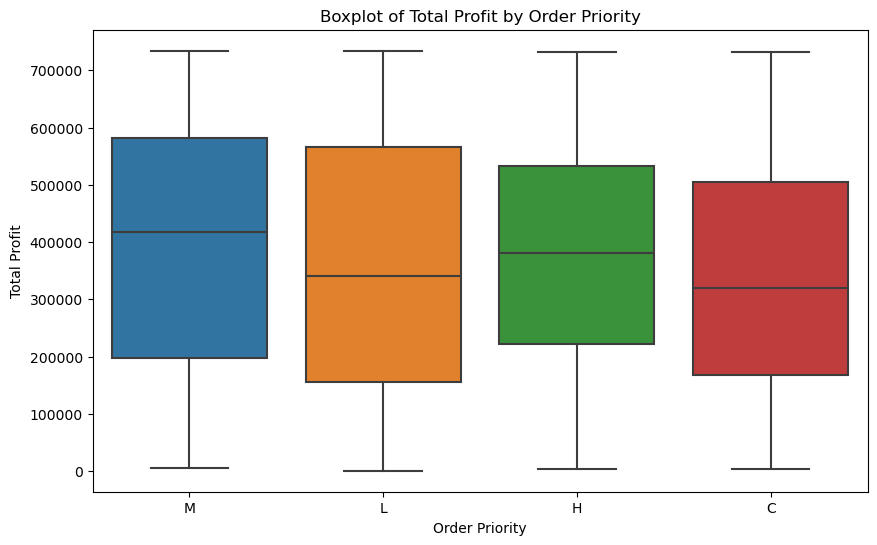

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OrderPriority', y='TotalProfit', data=USA_data_clothes)
plt.title(f'Boxplot of Total Profit by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Total Profit')
plt.show()

# HR_data

## Data description

In [6]:
HR = pd.read_csv('HR_data.csv')

In [7]:
HR.head(10)

,Emp ID,Name Prefix,First Name,Middle Initial,Last Name,Gender,E Mail,Father's Name,Mother's Name,Mother's Maiden Name,Date of Birth,Time of Birth,Age in Yrs.,Weight in Kgs.,Date of Joining,Quarter of Joining,Half of Joining,Year of Joining,Month of Joining,Month Name of Joining,Short Month,Day of Joining,DOW of Joining,Short DOW,Age in Company (Years),Salary,Last % Hike,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Password
0,742048,Drs.,Lizeth,P,Mccoll,F,lizeth.mccoll@ibm.com,Renato Mccoll,Serena Mccoll,Broxton,7/5/1973,08:14:43 AM,47.19,49,1/7/1995,Q1,H1,1995,1,January,Jan,7,Saturday,Sat,25.67,147446,14%,171-86-6830,216-703-2865,Alliance,Stark,Alliance,OH,44601,Midwest,lpmccoll,b5CDsd1Mz.
1,671135,Ms.,Argentina,O,Hern,F,argentina.hern@ntlworld.com,Earl Hern,Chrissy Hern,Tapley,10/15/1962,02:08:22 AM,57.92,53,4/1/1986,Q2,H1,1986,4,April,Apr,1,Tuesday,Tue,34.44,129174,8%,083-02-3078,202-572-0136,Washington,District of Columbia,Washington,DC,20411,South,aohern,vsUv&nFc?lM|2-
2,965851,Mr.,Damian,N,Patillo,M,damian.patillo@outlook.com,Harley Patillo,Lucinda Patillo,Etter,3/11/1975,07:48:45 PM,45.51,84,12/16/2004,Q4,H2,2004,12,December,Dec,16,Thursday,Thu,15.72,158746,8%,326-11-9852,209-784-3915,Burrel,Fresno,Burrel,CA,93607,West,dnpatillo,GQj^c:4#B:F8
3,224660,Drs.,Imogene,P,Hagopian,F,imogene.hagopian@gmail.com,Delmar Hagopian,Carolina Hagopian,Lockett,2/19/1995,03:15:09 PM,25.55,52,6/8/2017,Q2,H1,2017,6,June,Jun,8,Thursday,Thu,3.23,55761,14%,656-36-0772,210-460-6327,Bryan,Brazos,Bryan,TX,77806,South,iphagopian,d[aHK7aiH&
4,852694,Mr.,Walker,E,Wallach,M,walker.wallach@aol.com,Gale Wallach,Georgianna Wallach,Creekmore,8/5/1992,01:03:46 PM,28.09,50,2/28/2020,Q1,H1,2020,2,February,Feb,28,Friday,Fri,0.51,197519,24%,296-15-3535,225-846-1969,Newllano,Vernon,Newllano,LA,71461,South,wewallach,kM\7h*}7
5,144102,Ms.,Jesusita,W,Hollie,F,jesusita.hollie@hotmail.com,Clement Hollie,Nilda Hollie,Barone,10/30/1987,04:55:43 AM,32.86,49,3/5/2015,Q1,H1,2015,3,March,Mar,5,Thursday,Thu,5.50,103839,6%,375-37-3861,209-219-5562,Topanga,Los Angeles,Topanga,CA,90290,West,jwhollie,p1-G0\b~
6,687793,Mr.,Fausto,P,Esqueda,M,fausto.esqueda@aol.com,Randal Esqueda,Yang Esqueda,Cullens,4/23/1971,10:25:52 AM,49.39,75,10/29/1998,Q4,H2,1998,10,October,Oct,29,Thursday,Thu,21.85,60101,5%,095-02-0857,216-722-2112,Somerdale,Tuscarawas,Somerdale,OH,44678,Midwest,fpesqueda,lX!iJCJF@[f-/F
7,636308,Mrs.,Vanda,S,Komar,F,vanda.komar@aol.com,Carlo Komar,Katia Komar,Almanzar,9/2/1962,02:52:40 AM,58.04,52,7/25/2018,Q3,H2,2018,7,July,Jul,25,Wednesday,Wed,2.10,115639,26%,002-11-5408,216-224-9563,Akron,Summit,Akron,OH,44312,Midwest,vskomar,I0!gVO~XFHG0\9q
8,218660,Mrs.,Destiny,A,Nicholson,F,destiny.nicholson@gmail.com,Ramon Nicholson,Tanika Nicholson,Schauer,7/1/1995,01:58:42 PM,25.19,54,11/22/2016,Q4,H2,2016,11,November,Nov,22,Tuesday,Tue,3.78,126048,19%,386-37-5628,201-997-3957,Atlantic City,Atlantic,Atlantic City,NJ,8401,Northeast,danicholson,s|?t/%X+
9,465691,Ms.,Evie,V,Hamby,F,evie.hamby@gmail.com,Devin Hamby,Jerica Hamby,Plum,6/22/1980,12:17:42 AM,40.22,60,10/4/2013,Q4,H2,2013,10,October,Oct,4,Friday,Fri,6.91,193757,28%,682-24-5946,201-331-7085,Rockaway,Morris,Rockaway,NJ,7866,Northeast,evhamby,Xv7!P;xf


In [8]:
HR.shape

(5000000, 37)

In [9]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 37 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Emp ID                  int64  
 1   Name Prefix             object 
 2   First Name              object 
 3   Middle Initial          object 
 4   Last Name               object 
 5   Gender                  object 
 6   E Mail                  object 
 7   Father's Name           object 
 8   Mother's Name           object 
 9   Mother's Maiden Name    object 
 10  Date of Birth           object 
 11  Time of Birth           object 
 12  Age in Yrs.             float64
 13  Weight in Kgs.          int64  
 14  Date of Joining         object 
 15  Quarter of Joining      object 
 16  Half of Joining         object 
 17  Year of Joining         int64  
 18  Month of Joining        int64  
 19  Month Name of Joining   object 
 20  Short Month             object 
 21  Day of Joining          int64  

In [37]:
HR.isnull().sum()

Emp ID                    0
Name Prefix               0
First Name                0
Middle Initial            0
Last Name                 0
Gender                    0
E Mail                    0
Father's Name             0
Mother's Name             0
Mother's Maiden Name      0
Date of Birth             0
Time of Birth             0
Age in Yrs.               0
Weight in Kgs.            0
Date of Joining           0
Quarter of Joining        0
Half of Joining           0
Year of Joining           0
Month of Joining          0
Month Name of Joining     0
Short Month               0
Day of Joining            0
DOW of Joining            0
Short DOW                 0
Age in Company (Years)    0
Salary                    0
Last % Hike               0
SSN                       0
Phone No.                 0
Place Name                0
County                    0
City                      0
State                     0
Zip                       0
Region                    0
User Name           

In [11]:
print(HR['Age in Yrs.'].min(), HR['Age in Yrs.'].max())

21.0 60.0


## Data Preprocessing

In [35]:
# Define age groups
bins = [18, 36, 56, float('inf')]
labels = ['Young Adults', 'Middle-aged Adults', 'Older Adults']
# Add a new column 'Age Group' to HR DataFrame
HR['Age Group'] = pd.cut(HR['Age in Yrs.'], bins=bins, labels=labels, right=False)

## Univariate Analysis

/var/folders/cy/mcxz65_n14z24t919qlxn1rr0000gp/T/ipykernel_17679/2172208863.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_state_count = HR.groupby(['Age Group', 'State']).size().reset_index(name='Count')


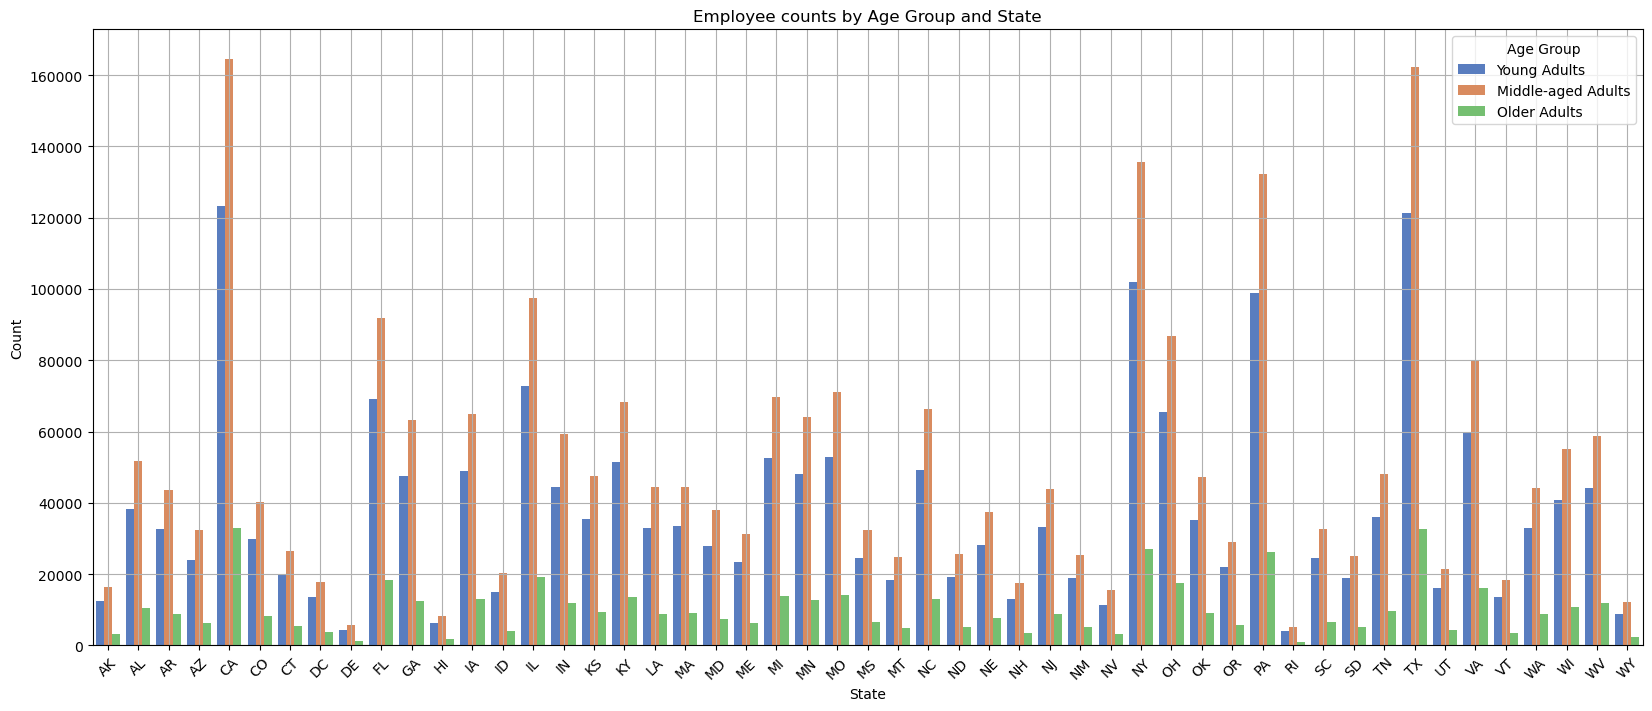

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by 'Age Group' and 'State'
age_state_count = HR.groupby(['Age Group', 'State']).size().reset_index(name='Count')

# Plotting countplot using seaborn
plt.figure(figsize=(20, 8))
sns.barplot(x='State', y='Count', hue='Age Group', data=age_state_count, palette='muted')
plt.title('Employee counts by Age Group and State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Age Group')
plt.grid(True)
plt.show()